In [8]:
import pandas as pd
import json
# Selenium
from selenium import webdriver

# Make a http GET request for data fetch
__selenium_driver_path__: a path where geckodriver is located in your local storage(you can use whatever browser driver you want) 

In [ ]:
home_url = "https://sauktiniai.karys.lt"
url = "https://sauktiniai.karys.lt/list.php?region=6"
selenium_driver_path = ''

driver = webdriver.Firefox(executable_path=selenium_driver_path)
driver.get(home_url)
r = driver.execute_script('''
    var xmlHttp = new XMLHttpRequest();
    var url = {};
    xmlHttp.open( "GET", url, false);
    xmlHttp.setRequestHeader("range", "0-99999999999");
    xmlHttp.send(null);
    return xmlHttp.responseText;
'''.format(json.dumps(url))
)
driver.close()

# Convert JSON data to the DataFrame

In [67]:
df = pd.read_json(r)

### Search operation

In [165]:
df[df.lastname.str.lower() == '']

,pos,number,name,lastname,bdate,department,info


### Filter out only those entries where info field does not contains 'atidėta' keyword

In [123]:
df_chosen = df[~df['info'].str.contains('atidėta')]

### Entries distribution by birth year

<BarContainer object of 5 artists>

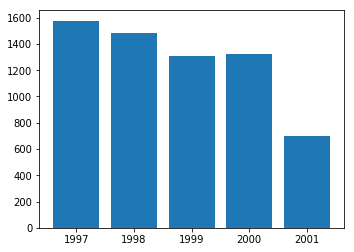

In [162]:
import matplotlib.pyplot as plt

count_by_year = df_chosen.groupby('bdate').count().reset_index()[['bdate', 'pos']]

names = count_by_year.bdate.values
values = count_by_year.pos.values

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.bar(names, values)

### Save to excel

In [69]:
df.to_excel('sauktiniai_2020.xlsx', index=False)